# Support Vector Machine

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cvxopt import matrix,solvers

### Read csv files containing extracted features from flower images

In [3]:
roses = pd.read_csv('rose_features.csv')
chrysanthemums = pd.read_csv('chrysanthemum_features.csv')
butterfly_pea = pd.read_csv('butterflypea_features.csv')

## Main Support Vector Machine Algorithm

In [4]:
def SVM(class1,class2,index):
    line = class1.append(class2,ignore_index=True).drop(columns='Unnamed: 0')
    
    features = np.zeros((len(line),2))
    features[:,0] = line['b']
    features[:,1] = line['eccentricity']
    
    z = np.zeros((len(line),1))
    z[:len(class1)] = 1.0
    z[len(class1):] = -1.0
    
    H = matrix((features@features.T)*(z@z.T))
    f = matrix(-np.ones(len(line)))
    
    A = matrix(-np.identity(len(line)))
    a = matrix(np.zeros(len(line)))
    
    b = matrix(0.0)
    B = matrix(z,(1,len(line)))
    
    sol = solvers.qp(H,f,A,a,B,b)
    
    alpha = np.round(np.array(sol['x']).flatten())
    alpha_index = np.where(alpha>0)[0]
    
    w = ((alpha*z.T)@features)[0]
    w0 = (1/z[np.int(alpha_index[index])]) - (w.T@features[np.int(alpha_index[index])])
    
    A = w[0]
    B = w[1]
    C = -w0

    m = -A/B
    b = C/B
    
    return m,b

### Calculate decision line between butterfly peas and roses

In [5]:
index = 0
m1,b1 = SVM(roses,butterfly_pea,index)

     pcost       dcost       gap    pres   dres
 0: -1.6651e+01 -4.3999e+01  1e+02  8e+00  2e+00
 1: -2.9685e+01 -5.1082e+01  4e+01  3e+00  6e-01
 2: -5.5431e+01 -7.7855e+01  3e+01  2e+00  4e-01
 3: -7.0352e+01 -7.9990e+01  1e+01  4e-01  8e-02
 4: -7.3855e+01 -7.5948e+01  3e+00  7e-02  2e-02
 5: -7.5251e+01 -7.5557e+01  4e-01  6e-03  1e-03
 6: -7.5421e+01 -7.5425e+01  4e-03  6e-05  1e-05
 7: -7.5424e+01 -7.5424e+01  4e-05  6e-07  1e-07
 8: -7.5424e+01 -7.5424e+01  4e-07  6e-09  1e-09
Optimal solution found.


## Plot of decision lines with scatterplot of flower datapoints

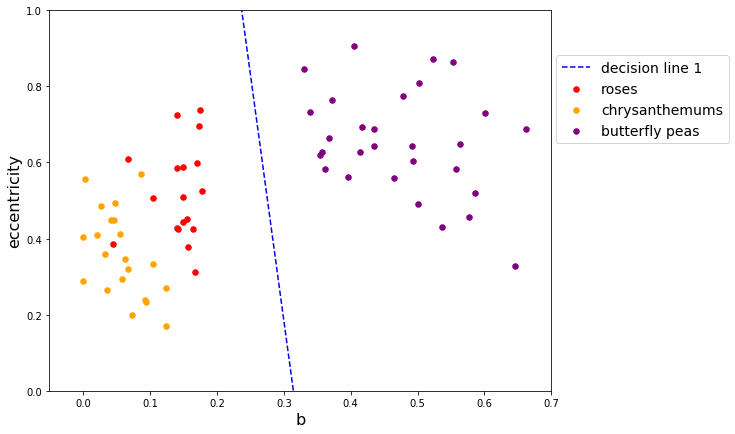

In [6]:
plt.figure(figsize=(9,7))

plt.scatter(roses['b'],roses['eccentricity'],c='red',s=30,label='roses')
plt.scatter(chrysanthemums['b'],chrysanthemums['eccentricity'],c='orange',s=30,label='chrysanthemums')
plt.scatter(butterfly_pea['b'],butterfly_pea['eccentricity'],c='purple',s=30,label='butterfly peas')
plt.plot(np.linspace(0,1),m1*np.linspace(0,1)+b1,'b--',label = 'decision line 1')
# plt.plot(np.linspace(0,1),m2*np.linspace(0,1)+b2,'k--',label = 'decision line 2')
plt.ylabel('eccentricity',fontsize=16)
plt.xlabel('b',fontsize=16)
plt.legend(loc=(1.01,0.65),fontsize=14)
plt.xlim(right=0.7)
plt.ylim(0,1)
# plt.savefig('evsb_svm.png',dpi=300,bbox_inches='tight')
plt.show()